In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

[source](http://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/)

Elephant parameters  

Parameter<br>$p_i$ | Real part<br>$B_i^x$ | Imaginary part<br>$B_i^y$ |
--|---|---
50-30i | 50 | -30
18+8i  | 18 |   8
12-10i | 12 | -10
14-60i |-14 | -60
40+20i | 40 |  20

\begin{array}{rl}
x(t) &= \sum_{k=0}^{\infty} A_k^x \cos(kt) + B_k^x \sin(kt)
\\
y(t) &= \sum_{k=0}^{\infty} A_k^y \cos(kt) + B_k^y \sin(kt)
\end{array}

\begin{array}{|c|c|c|}
i & (A_k^x, B_k^x) & (A_k^y, B_k^y)
\\ \hline
1 & 50i & -60-30i
\\
2 & 18i & 8i
\\
3 & 12 & -10i
\\
4 &  0 & 0
\\
5 &  -14 & 0
\\
\end{array}

In [4]:
	
"""
Author: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)
 
Based on a paper by:
Drawing an elephant with four complex parameters
Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017
"""
import pylab
 
# elephant parameters
p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece
 
def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    print(C)
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f
 
def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')
 
    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real
 
    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j
 
    x = np.append(fourier(t,Cx), [-p5.imag])
    y = np.append(fourier(t,Cy), [p5.imag])
 
    return x,y
 


[  0. +0.j   0.+50.j   0.+18.j  12. +0.j   0. +0.j -14. +0.j]
[  0. +0.j -60.-30.j   0. +8.j  -0.-10.j   0. +0.j   0. +0.j]


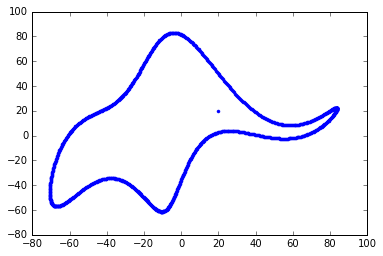

In [5]:
x, y = elephant(np.linspace(0,2*np.pi,1000), p1, p2, p3, p4, p5)
pylab.plot(y,-x,'.')
pylab.show()